A stroke, sometimes called a brain attack, occurs when something blocks blood supply to part of the brain or when a blood vessel in the brain bursts. 
In either cases the tissues suffer from hypoxy аnd can get damaged or die off. A stroke can cause lasting brain damage, long-term disability, or even death.

As stated above - there are two types of brain stroke:
- ischemic stroke
- hemorrhagic stroke
- mini stroke - transient ischemic attack(TIA)

The last one is reffered to situation where the blood flow to the brain is blocked for a short period of time and then restored(no more than 5 mins).

Depending on the affected aeria of the brain, the stoke can cause death or can alter the ability to move, speak, eat, talk, think and remember, control bowel and bladder, control emotions and other vital body functions.

But what are the risk factors?
External factors, that can be controlled:
- high blood pressure
- heart disease
- diabeted
- smoking
- birth control pills
- history of TIA's
- high red blood cell count
- high blood cholesterol and lipids
- lack of exercise 
- obesity
- smoking
- alcohol abuse
- drugs
- cardiac structural abnormalities
Factors, that cannot be controlled:
- older age
- race
- gender
- history of prior stroke
- genetics

Each year in __Bulgaria__, slightly more than 35,000 individuals experience brain strokes, and out of these cases, approximately 7,000 result in a fatal outcome for the affected individuals.
Stroke is ranked as the second leading cause of death worldwide with an annual mortality rate of about 5.5 million. Not only does the burden of stroke lie in the high mortality but the high morbidity also results in up to 50% of survivors being chronically disabled.

With that being said, it is evident that understanding and analyzing the risk factors is crucial for preventing strokes and mitigating their impact on individuals.
Let's shift our focus to the practical aspect of analyzing data and building predictive models using code. This analysis will enable us to work towards more effective stroke prevention strategies and outcomes.

__IMPORTS AND LOADING THE DATASET__

In [1]:
import mlflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV


from imblearn.under_sampling import CondensedNearestNeighbour,TomekLinks, OneSidedSelection, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, AllKNN, NeighbourhoodCleaningRule
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer

from sklearn.pipeline import Pipeline

In [2]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


__EXPLORATORY DATA ANALYSIS__

As we can see, the set has data regarding the ID of each patient, his gender, age, hypertension, existing heart disease(0-none, 1-existing), married, work type, residence type, glucose level, bmi, smoking status, previous strokes.

In [4]:
missing_data = dataset.isnull().sum()

In [5]:
missing_data

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

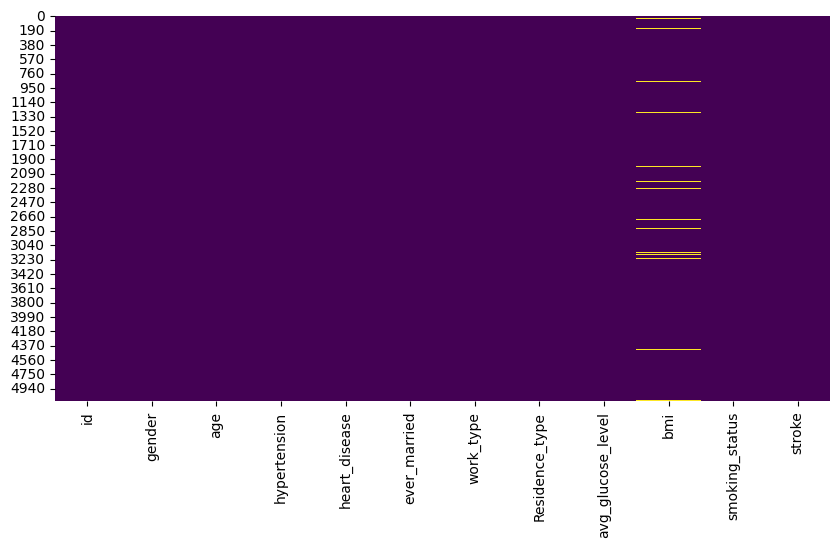

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.show()

We have missing data entries for the feature BMI index. However out of 5110, 201 is less than 5%. Given that the percentage is relatively small, we can consider imputing the missing values.

In the specific analysis, I have chose to use mode imputation to fill the missing 0,5% of the date.

In [7]:
bmi_mode = dataset['bmi'].mode()[0]
dataset['bmi'].fillna(bmi_mode, inplace=True)

Moving forward with the EDA process, if we look at the initial data, we can drop the ID feature as it is not going to be necessary for our purposes.

In [8]:
dataset = dataset.drop(columns=['id'])

In [9]:
dataset.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.885636,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698109,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


we can conclude that there is no missing data

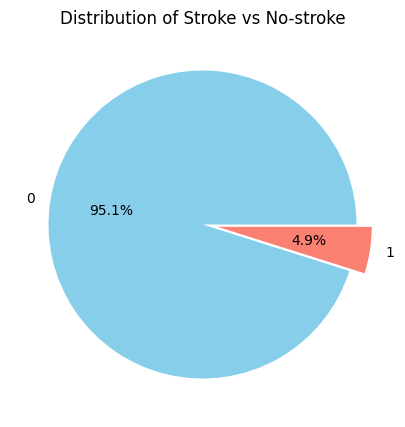

In [11]:
value_counts_strokes = dataset['stroke'].value_counts()
value_counts_strokes

plt.figure(figsize=(9, 5))

colors = ['skyblue', 'salmon']
dataset['stroke'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=False, colors=colors)
plt.title('Distribution of Stroke vs No-stroke')
plt.ylabel('')

plt.show()

__The class 0 - No Stroke are 4861 entries and for class 1 - Stroke we have only 249 samples.
The imbalance is roughly 1:20 for class 0.__

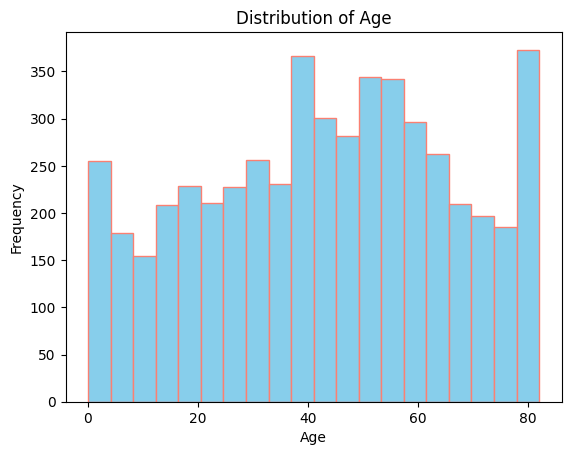

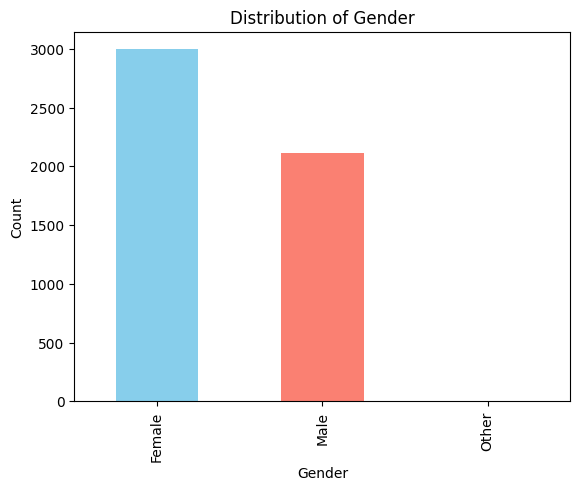

In [12]:
plt.hist(dataset['age'], bins=20, color='skyblue', edgecolor='salmon')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

dataset['gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

We can tell from the second plot that we have more female patients than male. The imbalance is roughly 1000 samples which is not a lot but not a small percentage of all cases too. 

Usually men suffer from skroke a bit more than women, which can be crucial when training a model and that can also impact the feature importance.

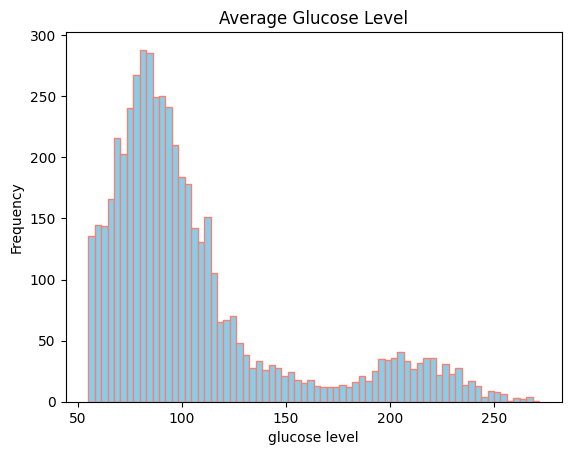

In [13]:
plt.hist(dataset['avg_glucose_level'], bins=70, color='skyblue', edgecolor='salmon')
plt.title('Average Glucose Level')
plt.xlabel('glucose level')
plt.ylabel('Frequency')
plt.show()


We dont have any otliers regarding AGL

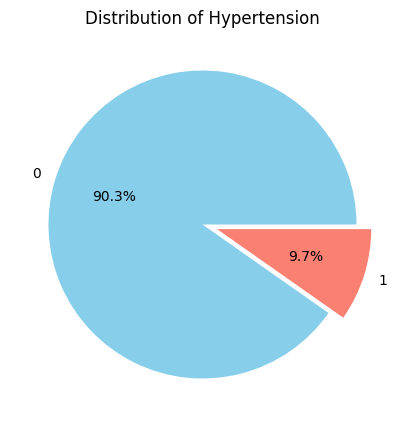

In [14]:
plt.figure(figsize=(9, 5))

colors = ['skyblue', 'salmon']
dataset['hypertension'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=False, colors=colors)
plt.title('Distribution of Hypertension')
plt.ylabel('')

plt.show()

Most of the patients do not have hypertension.
0 - no hypertension
1 - present hypertension

<Figure size 1000x600 with 0 Axes>

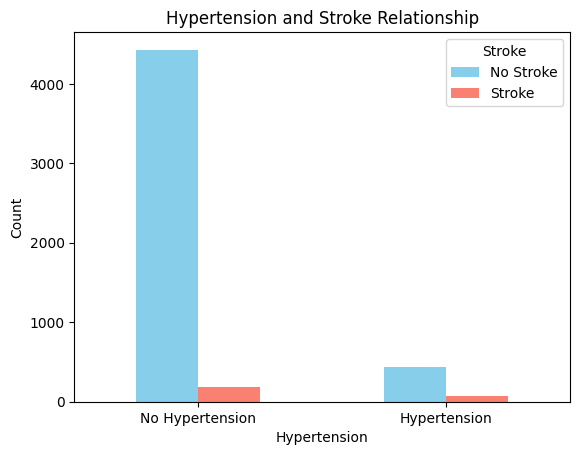

In [15]:
plt.figure(figsize=(10, 6))

hypertension_stroke_counts = dataset.groupby(['hypertension', 'stroke']).size().unstack()

hypertension_stroke_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Hypertension and Stroke Relationship')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Hypertension', 'Hypertension'], rotation=0)
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])

plt.show()

We can clearly see that there is no huge correlation between having hypertension and having a stroke, as per the dataset we are looking at. 

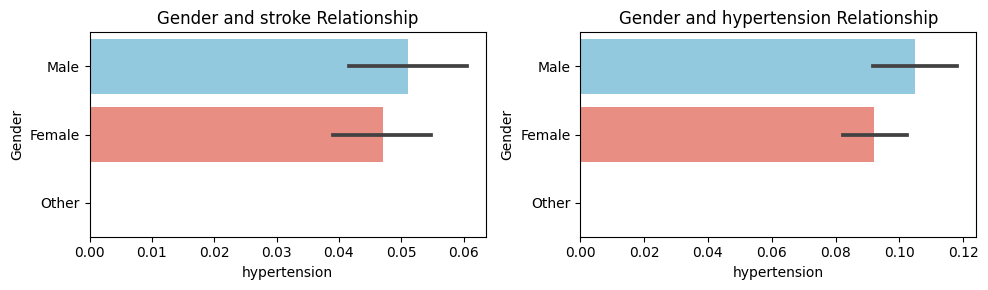

In [16]:
plt.figure(figsize=(10, 3))

plt.subplot(1,2,1)
sns.barplot(x='stroke', y='gender', data=dataset, palette=['skyblue', 'salmon'])
plt.title('Gender and stroke Relationship')
plt.xlabel('hypertension')
plt.ylabel('Gender')


plt.subplot(1,2,2)
sns.barplot(x='hypertension', y='gender', data=dataset, palette=['skyblue', 'salmon'])
plt.title('Gender and hypertension Relationship')
plt.xlabel('hypertension')
plt.ylabel('Gender')

plt.tight_layout()
plt.show()


Certenly, there is no huge difference between genders regarding having stroke and hypertension.
Just a sight onset for male patients.

In [17]:
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

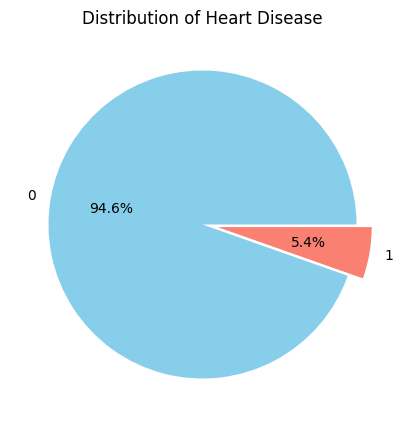

In [18]:
plt.figure(figsize=(9, 5))
colors = ['skyblue', 'salmon']
dataset['heart_disease'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=False, colors=colors)
plt.title('Distribution of Heart Disease')
plt.ylabel('')

plt.show()

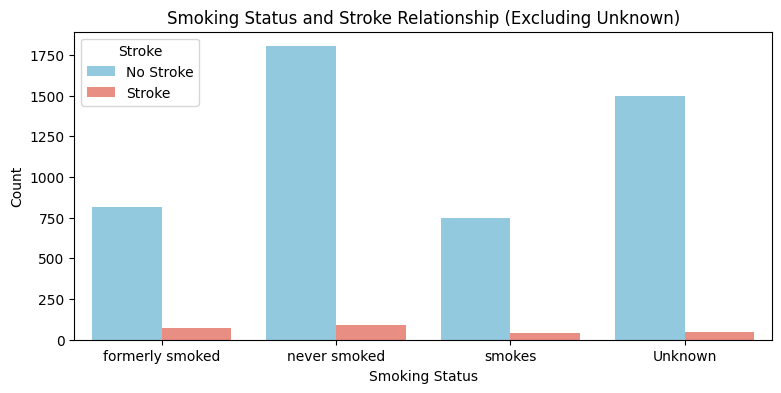

In [19]:

plt.figure(figsize=(9, 4))
sns.countplot(x='smoking_status', hue='stroke', data=dataset, palette=['skyblue', 'salmon'])
plt.title('Smoking Status and Stroke Relationship (Excluding Unknown)')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])

plt.show()


Negative Linear Correlation -  between smoking status and having a stroke. Let's check how many of the enries for smoking status are unknown:

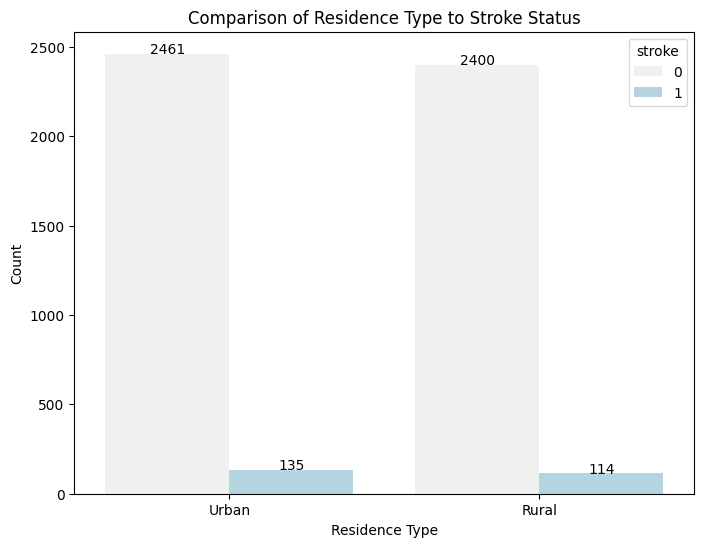

In [20]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Residence_type', hue='stroke', data=dataset, color='lightblue')
plt.title('Comparison of Residence Type to Stroke Status')
plt.xlabel('Residence Type')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha='center')

plt.show()

No significant relationship between residence type and having a previous stroke.

We are also one-hot enconding the categorical variables. This will create a binary column for each category in the columns.

In [21]:
dataset = pd.get_dummies(dataset, columns=['gender', 'Residence_type', 'work_type', 'ever_married'])

In [22]:
dataset['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

A lot of entries are Unknown so we will fill them in.


__Fill-out of missing data - Smoking Status__

We will try with several different model to identify the best paramenters to fill the "Unknown" entries in "smoking_status" feature. Once identified -  it will be incorporated to a pipeline.

In [23]:
dataset_knn_smoking_model = dataset.copy()

In [24]:
# Create the mlflow experiment
experiment_model_smokers = mlflow.create_experiment(name = 'knn_model_smokers')
mlflow.start_run(experiment_id=experiment_model_smokers)

<ActiveRun: >

In [25]:
# Split the dataset into know and unknnown subsets based on the smoking status column
## also create trainig and test sets

dataset_known = dataset_knn_smoking_model[dataset_knn_smoking_model['smoking_status'].str.strip() != 'Unknown']
dataset_unknown = dataset_knn_smoking_model[dataset_knn_smoking_model['smoking_status'].str.strip() == 'Unknown']

features = ['age', 'hypertension', 'heart_disease']
target = 'smoking_status'
X_known = dataset_known[features]
y_known = dataset_known[target]
X_unknown = dataset_unknown[features]

dataset_knn_smoking_model['smoking_status'].replace('Unknown', np.nan, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)


In [26]:
## create a model with num of neighbors equal to 3
knn_model_smokers = KNeighborsClassifier(n_neighbors=3)
knn_model_smokers.fit(X_train, y_train)

predicted_smoking_status = knn_model_smokers.predict(X_unknown[features])
print(len(dataset_knn_smoking_model[target].isna()))
print(len(predicted_smoking_status))

dataset_knn_smoking_model.loc[dataset_knn_smoking_model[target].isna(), target] = predicted_smoking_status
y_pred = knn_model_smokers.predict(X_test)
accuracy_knn_smokers = accuracy_score(y_test, y_pred)

mlflow.set_tag("knn_model_smokers", "knn1")
mlflow.log_param("n_neighbors", 3)
mlflow.log_metric("accuracy", accuracy_knn_smokers)
print(f'Accuracy: {accuracy_knn_smokers:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

mlflow.sklearn.log_model(knn_model_smokers, "knn_model_smokers")

mlflow.end_run()

5110
1544
Accuracy: 0.39
Classification Report:
                 precision    recall  f1-score   support

formerly smoked       0.23      0.41      0.30       175
   never smoked       0.55      0.50      0.52       379
         smokes       0.33      0.12      0.18       160

       accuracy                           0.39       714
      macro avg       0.37      0.34      0.33       714
   weighted avg       0.42      0.39      0.39       714

Confusion Matrix:
[[ 72  91  12]
 [163 190  26]
 [ 74  67  19]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


There is still room for improvement. Smokes has relatively low recall(true positives rate), as well as expected an F1 score, and low support.
The model performs better with never smoked class, compared to the smokes one. We have a lot of false negatives for all 3 classes too.

In [27]:
dataset_knn_smoking_model_gs = dataset.copy()

In [28]:
mlflow.start_run(experiment_id=experiment_model_smokers)

<ActiveRun: >

In [29]:
features = ['age', 'hypertension', 'heart_disease']
target = 'smoking_status'

dataset_known = dataset_knn_smoking_model_gs[dataset_knn_smoking_model_gs[target].str.strip() != 'Unknown']
dataset_unknown = dataset_knn_smoking_model_gs[dataset_knn_smoking_model_gs[target].str.strip() == 'Unknown']


X_known = dataset_known[features]
y_known = dataset_known[target]

dataset_knn_smoking_model_gs[target].replace('Unknown', pd.NA, inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

In [30]:
## Using grid search, we looking for the best parameters for our model
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

predicted_smoking_status = best_model.predict(dataset_unknown[features])

dataset_knn_smoking_model_gs.loc[dataset_knn_smoking_model_gs[target].isna(), target] = predicted_smoking_status

y_pred = best_model.predict(X_test)
accuracy_knn_smokers = accuracy_score(y_test, y_pred)

mlflow.set_tag("knn_model_smokers", "knn_grid_search")
mlflow.log_params(best_params)
mlflow.log_metric("accuracy", accuracy_knn_smokers)

mlflow.sklearn.log_model(best_model, "knn_model_smokers")

print(f'Best Parameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy_knn_smokers:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


mlflow.end_run()

Best Parameters: {'n_neighbors': 9}
Accuracy on Test Set: 0.44
Classification Report:
                 precision    recall  f1-score   support

formerly smoked       0.29      0.36      0.32       175
   never smoked       0.52      0.63      0.57       379
         smokes       0.28      0.07      0.11       160

       accuracy                           0.44       714
      macro avg       0.36      0.35      0.33       714
   weighted avg       0.41      0.44      0.41       714

Confusion Matrix:
[[ 63 107   5]
 [117 239  23]
 [ 37 112  11]]


We have reached a better accuracy on this second run having n_neighbors equal to 9,F1-score is also higher for all classes, the support values are similar. However F1 score got even lower.

In [31]:
unique_values = dataset['smoking_status'].unique()

# Print the unique values
print(unique_values)

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [32]:
dataset_knn_smoking_model_gs_1 = dataset.copy()

In [33]:
mlflow.start_run(experiment_id=experiment_model_smokers)

<ActiveRun: >

In [34]:
# decided to add more features, that might impact the predictions
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'stroke']
target = 'smoking_status'

dataset_known = dataset_knn_smoking_model_gs_1[dataset_knn_smoking_model_gs_1[target].str.strip() != 'Unknown']
dataset_unknown = dataset_knn_smoking_model_gs_1[dataset_knn_smoking_model_gs_1[target].str.strip() == 'Unknown']


X_known = dataset_known[features]
y_known = dataset_known[target]

dataset_knn_smoking_model_gs_1[target].replace('Unknown', pd.NA, inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

In [35]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

knn_model = KNeighborsClassifier()

#f1_scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

predicted_smoking_status = best_model.predict(dataset_unknown[features])

dataset_knn_smoking_model_gs_1.loc[dataset_knn_smoking_model_gs_1[target].isna(), target] = predicted_smoking_status

y_pred = best_model.predict(X_test)
accuracy_knn_smokers = accuracy_score(y_test, y_pred)

mlflow.set_tag("knn_model_smokers", "knn_grid_search")
mlflow.log_params(best_params)
mlflow.log_metric("accuracy", accuracy_knn_smokers)

mlflow.sklearn.log_model(best_model, "knn_model_smokers")

print(f'Best Parameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy_knn_smokers:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


mlflow.end_run()

Best Parameters: {'n_neighbors': 9}
Accuracy on Test Set: 0.47
Classification Report:
                 precision    recall  f1-score   support

formerly smoked       0.31      0.32      0.32       175
   never smoked       0.56      0.70      0.62       379
         smokes       0.24      0.08      0.12       160

       accuracy                           0.47       714
      macro avg       0.37      0.37      0.35       714
   weighted avg       0.43      0.47      0.43       714

Confusion Matrix:
[[ 56 104  15]
 [ 85 267  27]
 [ 39 108  13]]


The scores for our third class "smokes" are still pretty low. So we will try to adjust the distance. Then the leaf size and the algorithm.

In [36]:
mlflow.start_run(experiment_id=experiment_model_smokers)

<ActiveRun: >

In [37]:
dataset_knn_smoking_model_gs_2 = dataset.copy()

In [38]:
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'stroke']
target = 'smoking_status'

dataset_known = dataset_knn_smoking_model_gs_2[dataset_knn_smoking_model_gs_2[target].str.strip() != 'Unknown']
dataset_unknown = dataset_knn_smoking_model_gs_2[dataset_knn_smoking_model_gs_2[target].str.strip() == 'Unknown']


X_known = dataset_known[features]
y_known = dataset_known[target]

dataset_knn_smoking_model_gs_2[target].replace('Unknown', pd.NA, inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

In [39]:
param_grid = {'n_neighbors': [9],
              'p': [1, 2, 3]} 

knn_model = KNeighborsClassifier()


grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

predicted_smoking_status = best_model.predict(dataset_unknown[features])

dataset_knn_smoking_model_gs_2.loc[dataset_knn_smoking_model_gs_2[target].isna(), target] = predicted_smoking_status

y_pred = best_model.predict(X_test)
accuracy_knn_smokers = accuracy_score(y_test, y_pred)

mlflow.set_tag("knn_model_smokers", "knn_grid_search")
mlflow.log_params(best_params)
mlflow.log_metric("accuracy", accuracy_knn_smokers)

mlflow.sklearn.log_model(best_model, "knn_model_smokers")

print(f'Best Parameters Distance: {best_params}')
print(f'Accuracy on Test Set: {accuracy_knn_smokers:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


mlflow.end_run()

Best Parameters Distance: {'n_neighbors': 9, 'p': 1}
Accuracy on Test Set: 0.46
Classification Report:
                 precision    recall  f1-score   support

formerly smoked       0.31      0.31      0.31       175
   never smoked       0.55      0.69      0.61       379
         smokes       0.22      0.08      0.12       160

       accuracy                           0.46       714
      macro avg       0.36      0.36      0.35       714
   weighted avg       0.42      0.46      0.43       714

Confusion Matrix:
[[ 54 105  16]
 [ 85 263  31]
 [ 35 112  13]]


In [40]:
mlflow.start_run(experiment_id=experiment_model_smokers)

<ActiveRun: >

In [41]:
dataset_knn_smoking_model_gs_3 = dataset.copy()

In [42]:
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'stroke']
target = 'smoking_status'

dataset_known = dataset_knn_smoking_model_gs_3[dataset_knn_smoking_model_gs_3[target].str.strip() != 'Unknown']
dataset_unknown = dataset_knn_smoking_model_gs_3[dataset_knn_smoking_model_gs_3[target].str.strip() == 'Unknown']


X_known = dataset_known[features]
y_known = dataset_known[target]

dataset_knn_smoking_model_gs_3[target].replace('Unknown', pd.NA, inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

In [43]:
param_grid = {'n_neighbors': [9],
              'leaf_size': [10, 20, 30]}

knn_model = KNeighborsClassifier()


grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

predicted_smoking_status = best_model.predict(dataset_unknown[features])

dataset_knn_smoking_model_gs_3.loc[dataset_knn_smoking_model_gs_3[target].isna(), target] = predicted_smoking_status

y_pred = best_model.predict(X_test)
accuracy_knn_smokers = accuracy_score(y_test, y_pred)

mlflow.set_tag("knn_model_smokers", "knn_grid_search")
mlflow.log_params(best_params)
mlflow.log_metric("accuracy", accuracy_knn_smokers)

mlflow.sklearn.log_model(best_model, "knn_model_smokers")

print(f'Best Parameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy_knn_smokers:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


mlflow.end_run()

Best Parameters: {'leaf_size': 10, 'n_neighbors': 9}
Accuracy on Test Set: 0.47
Classification Report:
                 precision    recall  f1-score   support

formerly smoked       0.31      0.33      0.32       175
   never smoked       0.56      0.70      0.62       379
         smokes       0.23      0.08      0.12       160

       accuracy                           0.47       714
      macro avg       0.37      0.37      0.35       714
   weighted avg       0.43      0.47      0.44       714

Confusion Matrix:
[[ 57 101  17]
 [ 87 266  26]
 [ 39 108  13]]


In [44]:
mlflow.start_run(experiment_id=experiment_model_smokers)

<ActiveRun: >

In [45]:
dataset_knn_smoking_model_gs_4 = dataset.copy()

In [46]:
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'stroke']
target = 'smoking_status'

dataset_known = dataset_knn_smoking_model_gs_4[dataset_knn_smoking_model_gs_4[target].str.strip() != 'Unknown']
dataset_unknown = dataset_knn_smoking_model_gs_4[dataset_knn_smoking_model_gs_4[target].str.strip() == 'Unknown']


X_known = dataset_known[features]
y_known = dataset_known[target]

dataset_knn_smoking_model_gs_4[target].replace('Unknown', pd.NA, inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

In [47]:
param_grid = {'n_neighbors': [9],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_model = KNeighborsClassifier()


grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

predicted_smoking_status = best_model.predict(dataset_unknown[features])

dataset_knn_smoking_model_gs_4.loc[dataset_knn_smoking_model_gs_4[target].isna(), target] = predicted_smoking_status

y_pred = best_model.predict(X_test)
accuracy_knn_smokers = accuracy_score(y_test, y_pred)

mlflow.set_tag("knn_model_smokers", "knn_grid_search")
mlflow.log_params(best_params)
mlflow.log_metric("accuracy", accuracy_knn_smokers)

mlflow.sklearn.log_model(best_model, "knn_model_smokers")

print(f'Best Parameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy_knn_smokers:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


mlflow.end_run()

Best Parameters: {'algorithm': 'brute', 'n_neighbors': 9}
Accuracy on Test Set: 0.47
Classification Report:
                 precision    recall  f1-score   support

formerly smoked       0.30      0.30      0.30       175
   never smoked       0.56      0.70      0.62       379
         smokes       0.24      0.08      0.12       160

       accuracy                           0.47       714
      macro avg       0.36      0.36      0.35       714
   weighted avg       0.42      0.47      0.43       714

Confusion Matrix:
[[ 53 107  15]
 [ 85 267  27]
 [ 41 106  13]]


Unexpectedly, we achieved similar results when adjusting the different parameters. We can also try using ensemble methods like RF, which might capture better the relationships with the data.

In [48]:
mlflow.start_run(experiment_id=experiment_model_smokers)

<ActiveRun: >

In [49]:
dataset_knn_smoking_model_gs_5 = dataset.copy()

In [50]:
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'stroke']
target = 'smoking_status'

dataset_known = dataset_knn_smoking_model_gs_5[dataset_knn_smoking_model_gs_5[target].str.strip() != 'Unknown']
dataset_unknown = dataset_knn_smoking_model_gs_5[dataset_knn_smoking_model_gs_5[target].str.strip() == 'Unknown']


X_known = dataset_known[features]
y_known = dataset_known[target]

dataset_knn_smoking_model_gs_5[target].replace('Unknown', pd.NA, inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

In [51]:
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20]} 

rf_model = RandomForestClassifier()


grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

predicted_smoking_status = best_model.predict(dataset_unknown[features])

y_pred = best_model.predict(X_test)
accuracy_knn_smokers = accuracy_score(y_test, y_pred)

mlflow.set_tag("knn_model_smokers", "knn_grid_search")
mlflow.log_params(best_params)
mlflow.log_metric("accuracy", accuracy_knn_smokers)

mlflow.sklearn.log_model(best_model, "knn_model_smokers")

print(f'Best Parameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy_knn_smokers:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


mlflow.end_run()

Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Accuracy on Test Set: 0.50
Classification Report:
                 precision    recall  f1-score   support

formerly smoked       0.33      0.17      0.23       175
   never smoked       0.54      0.83      0.65       379
         smokes       0.37      0.10      0.16       160

       accuracy                           0.50       714
      macro avg       0.41      0.37      0.35       714
   weighted avg       0.45      0.50      0.44       714

Confusion Matrix:
[[ 30 138   7]
 [ 45 314  20]
 [ 16 128  16]]


The random forest model with the best parameters (max_depth=10, n_estimators=100) achieved an accuracy of 50% on the test set. However, its performance is limited, showing challenges in accurately predicting all smoking categories with notable imbalances in precision and recall. We can consider using Over/ Undersampling or a combination between the two methods to achieve better results. 

With that being said, we are going to use the last model to fill in the missing values 'Unknown' for the smoking status.

Is there a simpler way to perform this task ? Other option would be to just distibute proportionally among the known catageories based on their frequencies. But in our case the dataset is complex and the missing values are not easily predictable,so using a machine learning algorithm like Random Forest could provide more accurate imputations.

In [52]:
f_df_sm = dataset.copy()

In [53]:
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'stroke']
target = 'smoking_status'

dataset_known = f_df_sm[f_df_sm[target].str.strip() != 'Unknown']
dataset_unknown = f_df_sm[f_df_sm[target].str.strip() == 'Unknown']


X_known = dataset_known[features]
y_known = dataset_known[target]

f_df_sm[target].replace('Unknown', pd.NA, inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

In [54]:
best_params = grid_search.best_params_
best_rf_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])

smoking_status_pipeline = Pipeline([
    ('classifier', best_rf_model)
])


smoking_status_pipeline.fit(X_train, y_train)

y_pred = smoking_status_pipeline.predict(X_test)


from sklearn.metrics import classification_report, accuracy_score

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

f_df_sm.loc[f_df_sm[target].isna(), target] = predicted_smoking_status

Classification Report:
                 precision    recall  f1-score   support

formerly smoked       0.31      0.13      0.18       175
   never smoked       0.54      0.85      0.66       379
         smokes       0.35      0.09      0.14       160

       accuracy                           0.50       714
      macro avg       0.40      0.36      0.33       714
   weighted avg       0.44      0.50      0.42       714

Accuracy Score: 0.5014005602240896


In [55]:
values = f_df_sm['smoking_status'].value_counts()
values

smoking_status
never smoked       3156
formerly smoked    1079
smokes              875
Name: count, dtype: int64

In [56]:
f_df_sm.dtypes

age                        float64
hypertension                 int64
heart_disease                int64
avg_glucose_level          float64
bmi                        float64
smoking_status              object
stroke                       int64
gender_Female                 bool
gender_Male                   bool
gender_Other                  bool
Residence_type_Rural          bool
Residence_type_Urban          bool
work_type_Govt_job            bool
work_type_Never_worked        bool
work_type_Private             bool
work_type_Self-employed       bool
work_type_children            bool
ever_married_No               bool
ever_married_Yes              bool
dtype: object

In [57]:
df = f_df_sm.copy()

In [58]:
# One-hot encoding "smoking_status" variable

df = pd.get_dummies(df, columns=['smoking_status'])


In [59]:
df.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                        bool
gender_Male                          bool
gender_Other                         bool
Residence_type_Rural                 bool
Residence_type_Urban                 bool
work_type_Govt_job                   bool
work_type_Never_worked               bool
work_type_Private                    bool
work_type_Self-employed              bool
work_type_children                   bool
ever_married_No                      bool
ever_married_Yes                     bool
smoking_status_formerly smoked       bool
smoking_status_never smoked          bool
smoking_status_smokes                bool
dtype: object

Our target feature is 'Stroke', so the main purpose of the model would be to predict whather the patient will most probably have a stroke or not. We have two classes for Stroke, Class 1(stroke) and Class 0(no-stroke). Let's check if the we have a balance between the classes.

In [60]:
unique_values = df['stroke'].value_counts()
print('Unique Values Stroke target')
print(unique_values)
percentage_values = unique_values / len(df) * 100

print("Percentage of each value:")
print(percentage_values)

Unique Values Stroke target
stroke
0    4861
1     249
Name: count, dtype: int64
Percentage of each value:
stroke
0    95.127202
1     4.872798
Name: count, dtype: float64


Approximately 5% of our target data belongs to Class 1 (Stroke), which is considered a minority class. Effectively addressing this issue is crucial because failing to diagnose patients accurately poses a significant challenge. Our goal is to maximize the results for the minority class, ensuring that cases of Stroke are identified with high precision.

As we will be trying different methods to undersample the data and the cleaning ones rely on KNN, which is distance based, we will be unifying the data we have.

In [61]:
boolean_columns = ['gender_Female', 'gender_Male', 'gender_Other', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'Residence_type_Rural', 'Residence_type_Urban', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'ever_married_No', 'ever_married_Yes']

df[boolean_columns] = df[boolean_columns].astype(int)
df['stroke'] = df['stroke'].astype(int)


In [62]:
df.dtypes


age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                       int64
gender_Male                         int64
gender_Other                        int64
Residence_type_Rural                int64
Residence_type_Urban                int64
work_type_Govt_job                  int64
work_type_Never_worked              int64
work_type_Private                   int64
work_type_Self-employed             int64
work_type_children                  int64
ever_married_No                     int64
ever_married_Yes                    int64
smoking_status_formerly smoked      int64
smoking_status_never smoked         int64
smoking_status_smokes               int64
dtype: object

In [63]:
smoking_status_pipeline

Pipeline(steps=[('classifier', RandomForestClassifier(max_depth=10))])

__BASELINE MODEL__

In [64]:
baseline = df.copy()

In [65]:
baseline_model = mlflow.create_experiment(name = 'Baseline Random Forest')

In [66]:
mlflow.start_run(experiment_id=baseline_model, run_name='Baseline Model')

X = baseline.drop('stroke', axis=1)
y = baseline['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42, max_depth=15, ccp_alpha=0.00043)
rf = rf.fit(X_train, y_train)

pred_train = rf.predict_proba(X_train)
roc_auc_train = roc_auc_score(y_train, pred_train[:, 1])
print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_train))

y_train_pred = rf.predict(X_train)
print('\nClassification Report for Train set:\n', classification_report(y_train, y_train_pred, zero_division=1))

pred_test = rf.predict_proba(X_test)
roc_auc_test = roc_auc_score(y_test, pred_test[:, 1])
print('\nTest set')
print('Random Forests roc-auc: {}'.format(roc_auc_test))

y_test_pred = rf.predict(X_test)
print('\nClassification Report for Test set:\n', classification_report(y_test, y_test_pred, zero_division=1))

mlflow.set_tag("model", "Baseline Random Forest")
mlflow.log_params({"random_state": 42})
mlflow.log_metrics({"roc-auc": roc_auc_test})
mlflow.sklearn.log_model(rf, "Baseline Forest")
mlflow.end_run()


Train set
Random Forests roc-auc: 0.9688479712455466

Classification Report for Train set:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3901
           1       1.00      0.01      0.01       187

    accuracy                           0.95      4088
   macro avg       0.98      0.50      0.49      4088
weighted avg       0.96      0.95      0.93      4088


Test set
Random Forests roc-auc: 0.8709845430107527

Classification Report for Test set:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.97      0.50      0.48      1022
weighted avg       0.94      0.94      0.91      1022



When dealing with classification tasks, it's better to use ROC-AUC as a measurement.ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. AUC stands for "Area under the ROC Curve." AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. However it's not sensitive to imbalance and the score remains high, despite the bad results for the minority class.

__CHOOSING UNDERSAMPLING TECHNIQUE__

Our main goal is to improve the model by controlling the imbalance, because imbalanced one can lead to biased models, that are biased towards the majority class. Also class imbalance can lead to wrong diagnosis in our case, where our main goal is to predict the brain stroke possibility. The model we are builing has to generize pretty well. 

We will begin by testing the different cleaning undersampling methods. This preserves the total count of the majority class.

In [67]:
undersampl_rf_pred = mlflow.create_experiment(name = 'Undersampling Comparison/ Random Forest')

In [68]:
undersampler_dict = {
    'cnn': CondensedNearestNeighbour(
        sampling_strategy='auto',
        random_state=0,
        n_neighbors=1,
        n_jobs=4),

    'tomek': TomekLinks(
        sampling_strategy='auto',
        n_jobs=4),

    'oss': OneSidedSelection(
        sampling_strategy='auto',
        random_state=0,
        n_neighbors=1,
        n_jobs=4),

    'enn': EditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4),

    'renn': RepeatedEditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4,
        max_iter=100),

    'allknn': AllKNN(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4),

    'ncr': NeighbourhoodCleaningRule(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4,
        threshold_cleaning=0.5),

}

In [69]:
df_undersampling = df.copy()

In [70]:
# save the results
results_dict = {}
shapes_dict = {}

In [71]:
# random forest function
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(random_state=42, max_depth=15,ccp_alpha=0.00043)

    rf = rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    
    return roc_auc_score(y_test, pred[:, 1])

In [72]:
# separation

X = df_undersampling.drop('stroke', axis=1)
y = df_undersampling['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# as many undersampling techniques use KNN, we put the variables in the same scale
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# train the model

roc = run_randomForests(X_train, X_test, y_train, y_test)

results_dict['full_data'] = roc
shapes_dict['full_data'] = len(X_train)

Train set
Random Forests roc-auc: 0.968795879844329
Test set
Random Forests roc-auc: 0.8710685483870968


In [73]:
# now we test the different under-samplers
for undersampler in undersampler_dict.keys():
    mlflow.start_run(experiment_id=undersampl_rf_pred, run_name=undersampler)
    print(undersampler)
    
    # resample the train set only
    X_resampled, y_resampled = undersampler_dict[undersampler].fit_resample(X_train, y_train)
    
    
    # train model and evaluate performance
    new = run_randomForests(X_resampled, X_test, y_resampled, y_test)

    # store results
    results_dict[undersampler] = new
    shapes_dict[undersampler] = len(X_resampled)
    print()
    mlflow.set_tag("model", "Random Forest")
    mlflow.log_params({"random_state": 42})
    mlflow.log_metrics({"roc-auc": new})
    #mlflow.sklearn.log_model(new, "Forest")
    mlflow.end_run()

cnn
Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 0.7909862231182796

tomek
Train set
Random Forests roc-auc: 0.9767623263580888
Test set
Random Forests roc-auc: 0.8621471774193549

oss
Train set
Random Forests roc-auc: 0.9789443821898183
Test set
Random Forests roc-auc: 0.8688844086021505

enn
Train set
Random Forests roc-auc: 0.9877529377555034
Test set
Random Forests roc-auc: 0.850268817204301

renn
Train set
Random Forests roc-auc: 0.9931319139845247
Test set
Random Forests roc-auc: 0.8529401881720431

allknn
Train set
Random Forests roc-auc: 0.9901534841332221
Test set
Random Forests roc-auc: 0.8462701612903225

ncr
Train set
Random Forests roc-auc: 0.9882591853103295
Test set
Random Forests roc-auc: 0.8478662634408602



In [74]:
results_dict

{'full_data': 0.8710685483870968,
 'cnn': 0.7909862231182796,
 'tomek': 0.8621471774193549,
 'oss': 0.8688844086021505,
 'enn': 0.850268817204301,
 'renn': 0.8529401881720431,
 'allknn': 0.8462701612903225,
 'ncr': 0.8478662634408602}

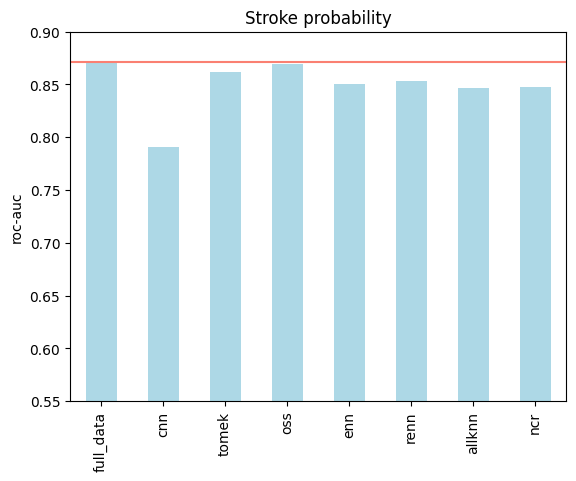

In [75]:
# print the performance of the model trained with different under-sampling methods

pd.Series(results_dict).plot.bar(color='lightblue')
plt.title('Stroke probability')
plt.ylabel('roc-auc')
plt.ylim(0.55, 0.9)
plt.axhline(results_dict['full_data'], color='salmon')
plt.show()

One Sided Selection gave us the best results regarding roc-auc metric. This method retained the obesrvations from Class 0 that are hard to classify, but removed the existing noise.
1. selects the hardest instanes.

2. removes Tomek links.(the noise)

The default threshold is 0.5, which is not working good as we saw in the baseline model. If the predicted probability for a positive class is greater than or equal to 0.5, the instance is classified as positive; otherwise, it's classified as negative. In our unbalanced dataset where the minority class is very important, we want to set a custom threshold and make the model more sensitive to the minority class. We will be probably risking the high accuracy but, having the patients diagnosed when needed is more important in some degree.

__Random Forest - OSS/ Threshold finetuning__

In [76]:
rf_off_thrs_tuning = mlflow.create_experiment(name = 'Random Forest - finetuning over and undersampling')

In [77]:
df_test = df.copy()

In [78]:
mlflow.start_run(experiment_id=rf_off_thrs_tuning, run_name='rf thrs 0.1')

<ActiveRun: >

In [79]:
from sklearn.metrics import f1_score
X = df_test.drop('stroke', axis=1)
y = df_test['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

sampler = OneSidedSelection(sampling_strategy='auto', random_state=0, n_neighbors=1, n_jobs=4)
X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)

# Train the model
rf = RandomForestClassifier(random_state=42, max_depth=15)
model = rf.fit(X_resampled, y_resampled)

# Threshold adjustment
custom_threshold = 0.1
y_test_pred_proba = rf.predict_proba(X_test_scaled)[:, 1]
y_test_pred = (y_test_pred_proba > custom_threshold).astype(int)

# Evaluate the model
roc_auc_test_1 = roc_auc_score(y_test, y_test_pred_proba)
print('Test set ROC-AUC: {:.4f}'.format(roc_auc_test_1))

f1 = f1_score(y_test, y_test_pred)

print('\nClassification Report for Test set:\n', classification_report(y_test, y_test_pred))
mlflow.set_tag("model", "Random Forest Threshold 0.1 OSS")
mlflow.log_params({"random_state": 42})

mlflow.log_metrics({"roc-auc": roc_auc_test_1,
                    "f1-score": f1})

mlflow.sklearn.log_model(model, "Random Forest Threshold 0.1 OSS")
mlflow.end_run()

Test set ROC-AUC: 0.8418

Classification Report for Test set:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91       960
           1       0.22      0.65      0.33        62

    accuracy                           0.84      1022
   macro avg       0.60      0.75      0.62      1022
weighted avg       0.93      0.84      0.87      1022



By tuning the thershold and applying undersampling we have somehow improved the model, but still the results for Class 1(minority class) are far from what would be good for clinicians. We can explore other methods as - combining under- and over-sampling techniques.
This would help us retain all observations from majority class, increase the number of examples from the minority one and remove(limit) the impact of the noise we have created during the oversampling.

But which methods to combine ?

__SMOTETOMEK AND SMOTEENN__




In [80]:
report_smotetomek = ''
report_smoteteen = ''

In [81]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [82]:
smotetomek_df = df.copy()

In [83]:
mlflow.start_run(experiment_id=rf_off_thrs_tuning, run_name='smotetomek 0.1')


<ActiveRun: >

In [84]:
# Splits the data

X = smotetomek_df.drop('stroke', axis=1)
y = smotetomek_df['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


sm = SMOTE(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=5
)
tl = TomekLinks(sampling_strategy='all')
smtomek = SMOTETomek(sampling_strategy='auto',smote=sm, random_state=0, tomek=tl)
X_smtl, y_smtl = smtomek.fit_resample(X_train, y_train)

# Scales the resampled training data
scaler = MinMaxScaler().fit(X_smtl)
X_train_scaled = scaler.transform(X_smtl)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestClassifier(random_state=42, max_depth=15)
model = rf.fit(X_train_scaled, y_smtl)

# evaluating on the original unresampled data
custom_threshold = 0.1
X_test_scaled = scaler.transform(X_test) 
y_test_pred_proba = rf.predict_proba(X_test_scaled)[:, 1]  
y_test_pred = (y_test_pred_proba > custom_threshold).astype(int)


roc_auc_test2 = roc_auc_score(y_test, y_test_pred_proba)
print('Test set ROC-AUC: {:.4f}'.format(roc_auc_test2))

f1 = f1_score(y_test, y_test_pred)
report_SMOTETomek = classification_report(y_test, y_test_pred, output_dict=True)
print('\nClassification Report for Test set:\n', report_SMOTETomek)
mlflow.set_tag("model", "SMOTETomek 0.1 RF")
mlflow.log_params({"random_state": 42})

mlflow.log_metrics({"roc-auc": roc_auc_test2,
                    "f1-score": f1})

mlflow.sklearn.log_model(model, "SMOTETomek 0.1 RF")
mlflow.end_run()

Test set ROC-AUC: 0.8330

Classification Report for Test set:
 {'0': {'precision': 0.9770408163265306, 'recall': 0.7979166666666667, 'f1-score': 0.8784403669724772, 'support': 960}, '1': {'precision': 0.18487394957983194, 'recall': 0.7096774193548387, 'f1-score': 0.29333333333333333, 'support': 62}, 'accuracy': 0.7925636007827789, 'macro avg': {'precision': 0.5809573829531813, 'recall': 0.7537970430107528, 'f1-score': 0.5858868501529053, 'support': 1022}, 'weighted avg': {'precision': 0.9289837265630323, 'recall': 0.7925636007827789, 'f1-score': 0.842944636947402, 'support': 1022}}


Leaving the custom threshold at 0.1 and applying a combination between SMOTE and Tomek Links, we have achieved better resulsts for class 1 - but the precision and the f1-score are still pretty low.

Reminder : 

           precision is equal to TP / TP + FP

           F1-score is equal to 2 x (Precision x Recall/ Precision + Recall)
           
           recall is TP/ TP + FN

This model still has a high rate of false positives seen by the low precision.

In [85]:
mlflow.start_run(experiment_id=rf_off_thrs_tuning, run_name='SMOTEENN 0.1')

<ActiveRun: >

In [86]:
smoteen_df = df.copy()

In [87]:
X = smoteen_df.drop('stroke', axis=1)
y = smoteen_df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from imblearn.combine import SMOTEENN

sm = SMOTE(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=5
)
enn = EditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,
    kind_sel='all'
)

smenn = SMOTEENN(
    sampling_strategy='auto', 
    random_state=0,
    smote=sm,
    enn=enn
)

X_smenn, y_smenn = smenn.fit_resample(X, y)


scaler = MinMaxScaler().fit(X_smenn)
X_train_scaled = scaler.transform(X_smenn)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=42, max_depth=15)
model = rf.fit(X_train_scaled, y_smenn)

# evaluating on the original unresampled data
custom_threshold = 0.1
X_test_scaled = scaler.transform(X_test) 
y_test_pred_proba = rf.predict_proba(X_test_scaled)[:, 1] 
y_test_pred = (y_test_pred_proba > custom_threshold).astype(int)

roc_auc_test3 = roc_auc_score(y_test, y_test_pred_proba)
print('Test set ROC-AUC: {:.4f}'.format(roc_auc_test3))

f1 = f1_score(y_test, y_test_pred)

print('\nClassification Report for Test set:\n', classification_report(y_test, y_test_pred))
mlflow.set_tag("model", "SMOTEENN 0.1 RF")
mlflow.log_params({"random_state": 42})

mlflow.log_metrics({"roc-auc": roc_auc_test3,
                    "f1-score": f1})

mlflow.sklearn.log_model(model, "SMOTEENN 0.1 RF")
mlflow.end_run()

Test set ROC-AUC: 0.9990

Classification Report for Test set:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94       960
           1       0.37      1.00      0.54        62

    accuracy                           0.90      1022
   macro avg       0.69      0.95      0.74      1022
weighted avg       0.96      0.90      0.92      1022



SMOTEENN performed better than SMOTETOMEK. Tomek links may not provide sufficien removal of noise if there are lower count of tomek links in the dataset.
ENN removes noisy and ambiguous samples. Obviously we have a lot of borderline cases.

In [88]:
mlflow.start_run(experiment_id=rf_off_thrs_tuning, run_name='smoteeen - thr 0.3')

<ActiveRun: >

In [89]:
df_smoteen_03 = df.copy()

In [90]:
X = df_smoteen_03.drop('stroke', axis=1)
y = df_smoteen_03['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from imblearn.combine import SMOTEENN

sm = SMOTE(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=5
)


enn = EditedNearestNeighbours(
    sampling_strategy='auto', # removes observation from the majority class only
    n_neighbors=3,
    kind_sel='all'
)

smenn = SMOTEENN(
    sampling_strategy='auto',
    random_state=0,
    smote=sm,
    enn=enn
)

X_smenn, y_smenn = smenn.fit_resample(X, y)

scaler = MinMaxScaler().fit(X_smenn)
X_train_scaled = scaler.transform(X_smenn)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=42, max_depth=15)
model = rf.fit(X_train_scaled, y_smenn)

# evaluating on the original unresampled data
custom_threshold = 0.5
X_test_scaled = scaler.transform(X_test)  
y_test_pred_proba = rf.predict_proba(X_test_scaled)[:, 1]
y_test_pred = (y_test_pred_proba > custom_threshold).astype(int)

roc_auc_test4 = roc_auc_score(y_test, y_test_pred_proba)
print('Test set ROC-AUC: {:.4f}'.format(roc_auc_test4))

f1 = f1_score(y_test, y_test_pred)
report_SMOTEENN = classification_report(y_test, y_test_pred, output_dict=True)

print('\nClassification Report for Test set:\n', report_SMOTEENN)
mlflow.set_tag("model", "SMOTEENN 0.3 RF")
mlflow.log_params({"random_state": 42})

mlflow.log_metrics({"roc-auc": roc_auc_test4,
                    "f1-score": f1})

mlflow.sklearn.log_model(model, "SMOTEENN 0.3 RF")
mlflow.end_run()

feature_importances = model.feature_importances_

Test set ROC-AUC: 0.9990

Classification Report for Test set:
 {'0': {'precision': 0.9937823834196892, 'recall': 0.9989583333333333, 'f1-score': 0.9963636363636363, 'support': 960}, '1': {'precision': 0.9824561403508771, 'recall': 0.9032258064516129, 'f1-score': 0.9411764705882352, 'support': 62}, 'accuracy': 0.9931506849315068, 'macro avg': {'precision': 0.9881192618852832, 'recall': 0.9510920698924731, 'f1-score': 0.9687700534759358, 'support': 1022}, 'weighted avg': {'precision': 0.9930952727834208, 'recall': 0.9931506849315068, 'f1-score': 0.9930156869721737, 'support': 1022}}


Pipelines help organize and automate the process by applying a sequence of data transformations and modle fitting in real life sceanarios. They also prevent data leakage, by ensuring that any data transformations are applied consistently during both training and testing phases.
By providing that encapsulation of the separate steps they also make the deployment process easier in production environments.

In [91]:
from imblearn.pipeline import Pipeline as imbpipeline

X = df_smoteen_03.drop('stroke', axis=1)
y = df_smoteen_03['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sm = SMOTE(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=5
)

enn = EditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,
    kind_sel='all'
)

smenn = SMOTEENN(
    sampling_strategy='auto',
    random_state=0,
    smote=sm,
    enn=enn
)


pipe = imbpipeline([
    ('smoteenn', smenn),
    ('mixmaxscaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(random_state=42, max_depth=15))
])


pipe.fit(X, y)


predictions = pipe.predict(X_test)

accuracy = pipe.score(X_test, y_test)
print(f"Accuracy: {accuracy}")
report = classification_report(y_test, predictions)


print(report)

Accuracy: 0.9931506849315068
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       960
           1       0.98      0.90      0.94        62

    accuracy                           0.99      1022
   macro avg       0.99      0.95      0.97      1022
weighted avg       0.99      0.99      0.99      1022



In [92]:
pipe

Pipeline(steps=[('smoteenn',
                 SMOTEENN(enn=EditedNearestNeighbours(), random_state=0,
                          smote=SMOTE(random_state=0))),
                ('mixmaxscaler', MinMaxScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=15, random_state=42))])

In [93]:
feature_importances

array([2.78242693e-01, 9.62250881e-03, 6.86670574e-03, 9.38619807e-02,
       6.26540134e-02, 4.29184019e-02, 4.03205457e-02, 3.85745739e-05,
       4.47738552e-02, 4.53325968e-02, 3.46080986e-02, 4.17503431e-05,
       3.20236769e-02, 3.46286890e-02, 1.20791385e-02, 6.93983355e-02,
       2.45693109e-02, 4.44581873e-02, 8.63547330e-02, 3.72062038e-02])

In [94]:
feature_names = X.columns 
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Print or use the feature names and their importance values
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

age: 0.27824269320075495
hypertension: 0.009622508812025692
heart_disease: 0.006866705743972633
avg_glucose_level: 0.09386198073208607
bmi: 0.06265401344823837
gender_Female: 0.042918401883914895
gender_Male: 0.04032054574545259
gender_Other: 3.857457385698172e-05
Residence_type_Rural: 0.04477385521657338
Residence_type_Urban: 0.04533259677955141
work_type_Govt_job: 0.034608098571931534
work_type_Never_worked: 4.1750343053698816e-05
work_type_Private: 0.03202367693860118
work_type_Self-employed: 0.034628689017300165
work_type_children: 0.012079138534490531
ever_married_No: 0.06939833551079477
ever_married_Yes: 0.02456931086268537
smoking_status_formerly smoked: 0.04445818728028541
smoking_status_never smoked: 0.08635473303609993
smoking_status_smokes: 0.03720620376833041


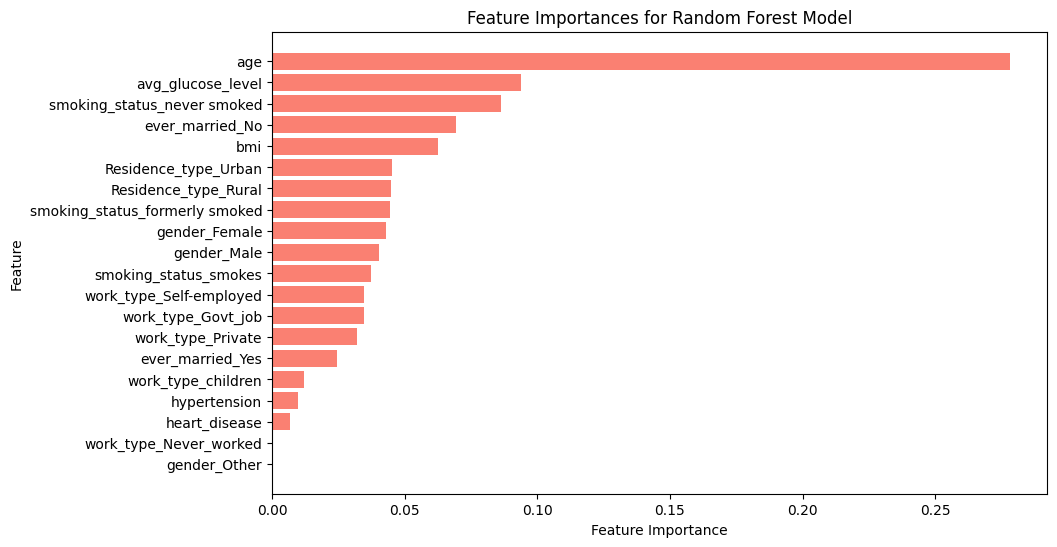

In [95]:
feature_names = X.columns 

indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))

bar_color = ['salmon' for _ in range(len(indices))]

plt.barh(range(len(indices)), feature_importances[indices], align='center', color=bar_color)
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest Model')
plt.show()

Age is a crucial factor, when it comes to the brain stroke risk, with a serious controibution of 28%, hypertenstion on the other hand is a low contributor in our study - 0.97%. The gender has a moderate importance with about 4 % for each gender(female and male), the two classes regarding the resince type are equal intermediate contributers with respectively 4.36%(Rural) and 4.72%(Urban). Low controbuters are the work type, ever married, heart disease and hypertension. We can conclude that the major features that contribute to thw results are:
1. Age - 28 %
2. Average Glucose level - 9 %
3. Smoking status - never smoker - 8 %
4. Ever Married no - 7 %
5. BMI(Body mass index) - 7 %

It's interesting that hypertension and heart disease are on the bottom of the chart, but they are normally stated as risk factors when trying to evaluate the risk of a brain stroke. When training a model , we can observe such cases because of the interraction of the features with eachother. Also the data distribution plays a crucial role - if there is not enough variation or if the dataset is imbalanced regaridng those two features, their importnce may be underestimated. Lets look at the pie charts .

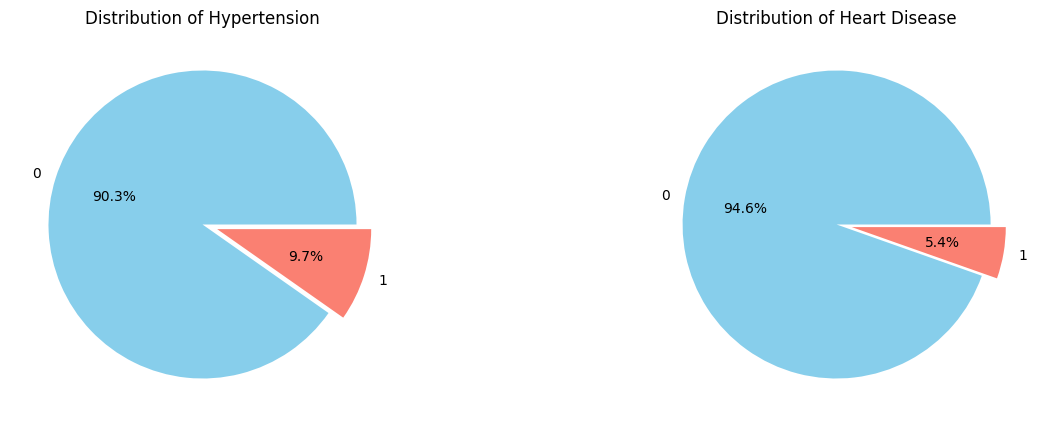

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

colors_hypertension = ['skyblue', 'salmon']
dataset['hypertension'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', shadow=False, colors=colors_hypertension, ax=axes[0]
)
axes[0].set_title('Distribution of Hypertension')
axes[0].set_ylabel('')

colors_heart_disease = ['skyblue', 'salmon']
dataset['heart_disease'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', shadow=False, colors=colors_heart_disease, ax=axes[1]
)
axes[1].set_title('Distribution of Heart Disease')
axes[1].set_ylabel('')

plt.show()


As we can see on the pie charts - the two features are pretty much imbalanced, which explains to their low position on the feature importance chart.

In [97]:
model1_report = report_SMOTETomek
model2_report = report_SMOTEENN

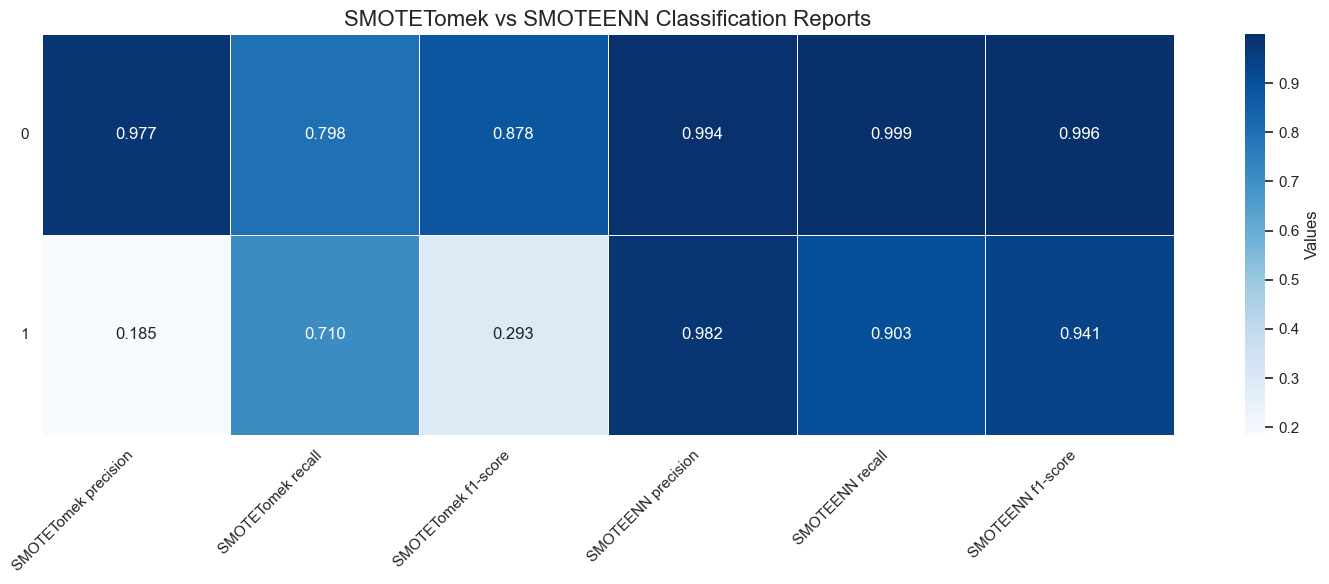

In [98]:
metrics = ['precision', 'recall', 'f1-score']

classes = [cls for cls in model1_report.keys() if cls.isdigit()]

data = {}

for metric in metrics:
    data[f'SMOTETomek {metric}'] = [model1_report[cls].get(metric, 0) for cls in classes]

for metric in metrics:
    data[f'SMOTEENN {metric}'] = [model2_report[cls].get(metric, 0) for cls in classes]

import pandas as pd
data_check = pd.DataFrame(data, index=classes)

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.set(font_scale=1.0) 

heatmap = sns.heatmap(
    data_check,
    annot=True,
    cmap='Blues',
    fmt=".3f",
    linewidths=.5,
    cbar_kws={'label': 'Values'}
)
plt.title('SMOTETomek vs SMOTEENN Classification Reports', fontsize=16)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.tight_layout() 
plt.show()



We have switched to SMOTEENN which results in better noise reduction.
Increasing the threshold resulted in reduction of false positives.
AUC is pretty close to 1 which indicates excellent preformance.
Let's plot learning curves of our best model, so we can evaluate the performance.


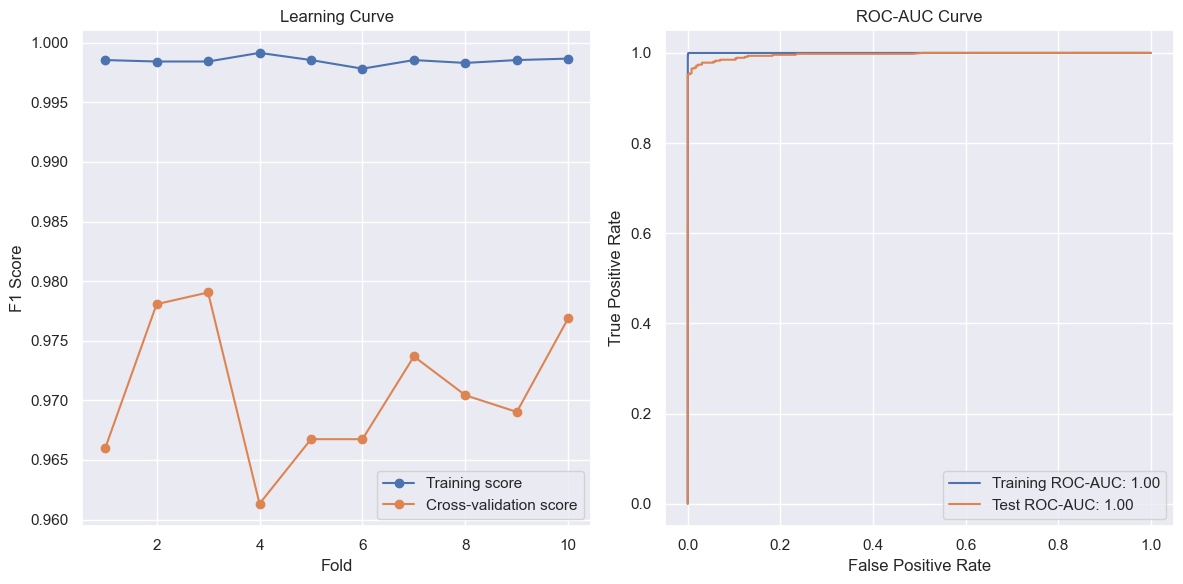

In [99]:

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
custom_scorer = make_scorer(f1_score, average='binary')
y_smenn = np.array(y_smenn)

train_scores = []
test_scores = []
train_roc_auc = []
test_roc_auc = []

for train_index, test_index in stratified_kfold.split(X_train_scaled, y_smenn):
    X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_fold, y_test_fold = y_smenn[train_index], y_smenn[test_index]

    rf.fit(X_train_fold, y_train_fold)

    train_pred = rf.predict(X_train_fold)
    test_pred = rf.predict(X_test_fold)

    f1_train = f1_score(y_train_fold, train_pred, average='binary', zero_division=1)
    f1_test = f1_score(y_test_fold, test_pred, average='binary', zero_division=1)

    train_scores.append(f1_train)
    test_scores.append(f1_test)

    train_fpr, train_tpr, _ = roc_curve(y_train_fold, rf.predict_proba(X_train_fold)[:, 1])
    test_fpr, test_tpr, _ = roc_curve(y_test_fold, rf.predict_proba(X_test_fold)[:, 1])

    train_roc_auc.append(roc_auc_score(y_train_fold, rf.predict_proba(X_train_fold)[:, 1]))
    test_roc_auc.append(roc_auc_score(y_test_fold, rf.predict_proba(X_test_fold)[:, 1]))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), train_scores, 'o-', label="Training score")
plt.plot(range(1, 11), test_scores, 'o-', label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Fold")
plt.ylabel("F1 Score")
plt.legend(loc="best")

plt.subplot(1, 2, 2)
plt.plot(train_fpr, train_tpr, label=f'Training ROC-AUC: {np.mean(train_roc_auc):.2f}')
plt.plot(test_fpr, test_tpr, label=f'Test ROC-AUC: {np.mean(test_roc_auc):.2f}')
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

__EVALUATION__

__F1: score__
Training Curve : we have a consistent high F1-score which tells us that the model is able to classify the + class well on the data it was trained on.
Cross-val curve: the fluctuation between lowest 0.965 and 0.980 indicates some variability on new unseen data. The small variation is normal because the different folds can have certain caracteristics that influence the performance (from fold to fold).

__ROC-AUC__
the values for both training and test set indicate that the model has excellent discriminative ability, it separates well Class 1 from Class 0 without any false positives or false negatives.

we can conclude that our model generalizes well on new unseen data.

In conclusion, this project represents a try to create a predictive modeling for brain stroke occurrences. By incorporating methodologies such as SMOTEENN for addressing class imbalance and using the power of Random Forests, our model has demonstrated remarkable accuracy identifying individuals at risk of experiencing a brain stroke.

The important evaluation metrics, including ROC-AUC and F1 scores, underscore the model's ability to maintain high performance across both minority and majority classes. This achievement is particularly crucial in the context of predicting brain strokes, where early and accurate identification of individuals prone to this medical condition can be life-saving.

The feature importance analysis further expands our understanding of the model's decision-making process. Notably, features such as 'age,' 'avg_glucose_level,' and 'smoking_status_never smoked' and 'bmi' emerge as top factors in predicting the likelihood of a brain stroke. This insight not only enhances the interpretability of the model but also provides valuable information for healthcare practitioners in developing targeted intervention strategies.

Also the model would be a  valuable tool in the ongoing efforts to mitigate the impact of brain strokes and improve overall public health.